# Lecture 10: Audio Equalizers
Audio Processing, MED4, Aalborg University, 2020

By 
- Jesper Kjær Nielsen (jkn@create.aau.dk), Audio Analysis Lab, Aalborg University, and
- Cumhur Erkut (cer@create.aau.dk), Multisensory Experience Lab, Aalborg University 

Last edited: 2020-03-29

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Why-do-we-need-audio-equalizers?" data-toc-modified-id="Why-do-we-need-audio-equalizers?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Why do we need audio equalizers?</a></span></li><li><span><a href="#A-typical-parametric-equalizer" data-toc-modified-id="A-typical-parametric-equalizer-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A typical parametric equalizer</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Notch-and-peak-filters" data-toc-modified-id="Notch-and-peak-filters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notch and peak filters</a></span><ul class="toc-item"><li><span><a href="#Notch-(bandstop)-filter" data-toc-modified-id="Notch-(bandstop)-filter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Notch (bandstop) filter</a></span></li><li><span><a href="#Peak-(bandpass)-filter" data-toc-modified-id="Peak-(bandpass)-filter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Peak (bandpass) filter</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Parametric-equalizer-filter" data-toc-modified-id="Parametric-equalizer-filter-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parametric equalizer filter</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Active-5-minutes-break" data-toc-modified-id="Active-5-minutes-break-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Active 5 minutes break</a></span></li></ul></li><li><span><a href="#Shelving-filters" data-toc-modified-id="Shelving-filters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shelving filters</a></span><ul class="toc-item"><li><span><a href="#Low-frequency-shelving-filter" data-toc-modified-id="Low-frequency-shelving-filter-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Low frequency shelving filter</a></span></li><li><span><a href="#High-frequency-shelving-filter" data-toc-modified-id="High-frequency-shelving-filter-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>High frequency shelving filter</a></span></li><li><span><a href="#Multi-band-parametric-equalizer" data-toc-modified-id="Multi-band-parametric-equalizer-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Multi-band parametric equalizer</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

## Introduction
In the next 20 minutes, you will learn

- what an audio equalizer is

- what it is used for

- what a parametric equalizer is


### Why do we need audio equalizers?
Many phenomena change the sound before it reaches our ears:
- amplifier
- loudspeaker
- room acoustics
- our hearing
- etc.

The main objective of audio equalizers is to **invert (some of) these changes**!

#### Example: hard surfaces boost the bass of a loudspeaker
We need an equalizer to compensate for the boost in bass.

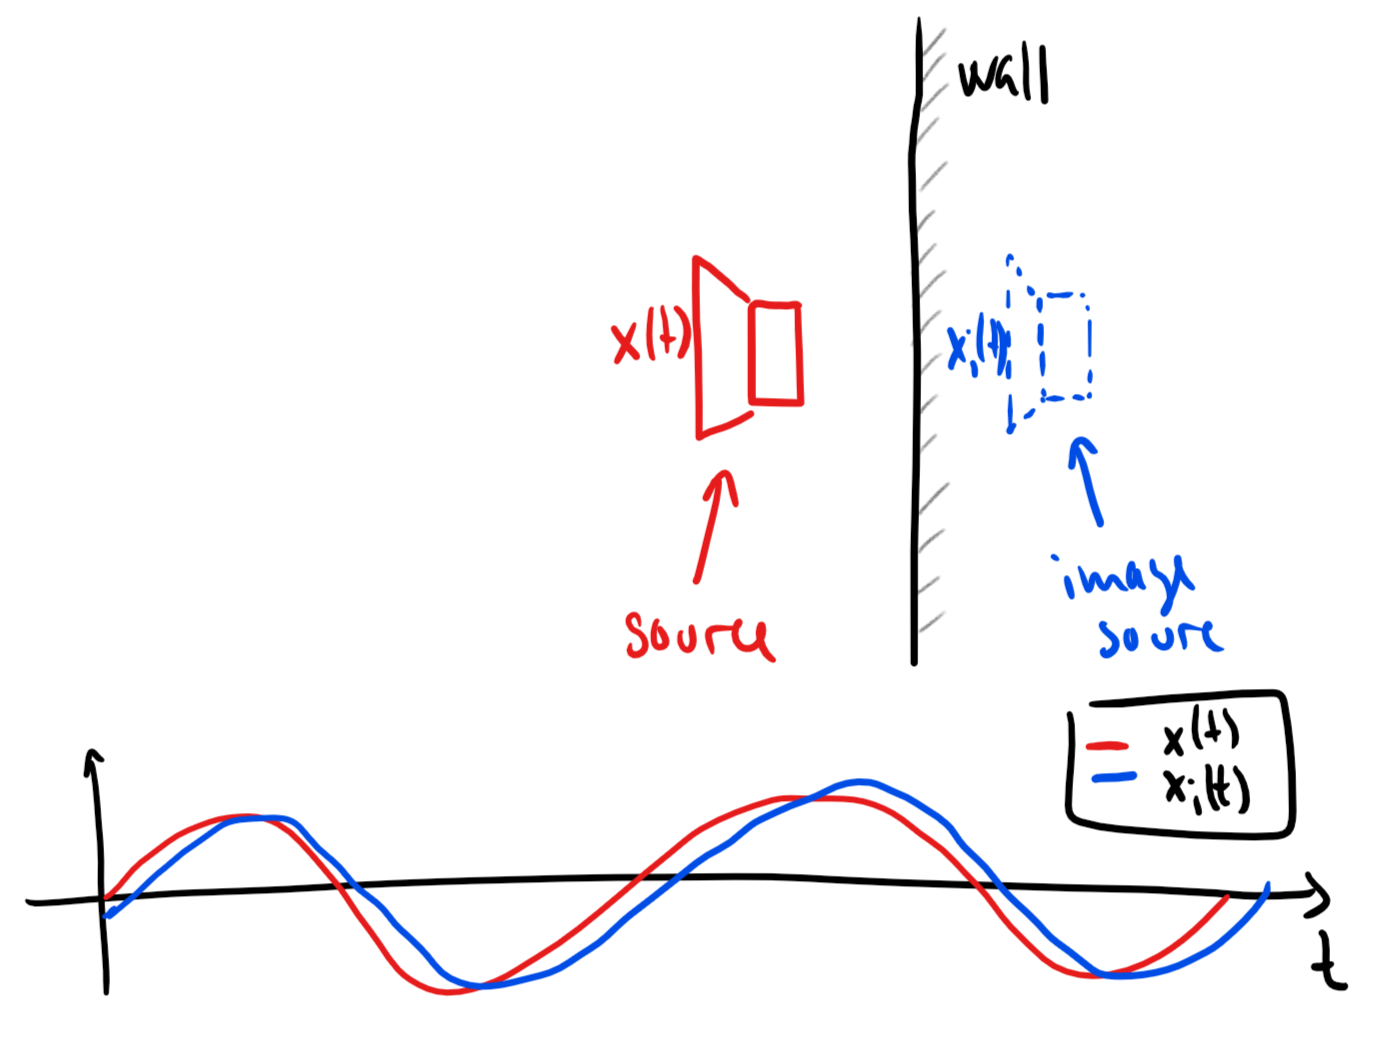

In [2]:
from IPython.display import Image
myWidth = 600
Image('figures/ap10BassBoost.png',width=myWidth)

#### Example: loudspeaker tuning
We need to tune the filters in the loudspeaker so that the listener hears what is intended.

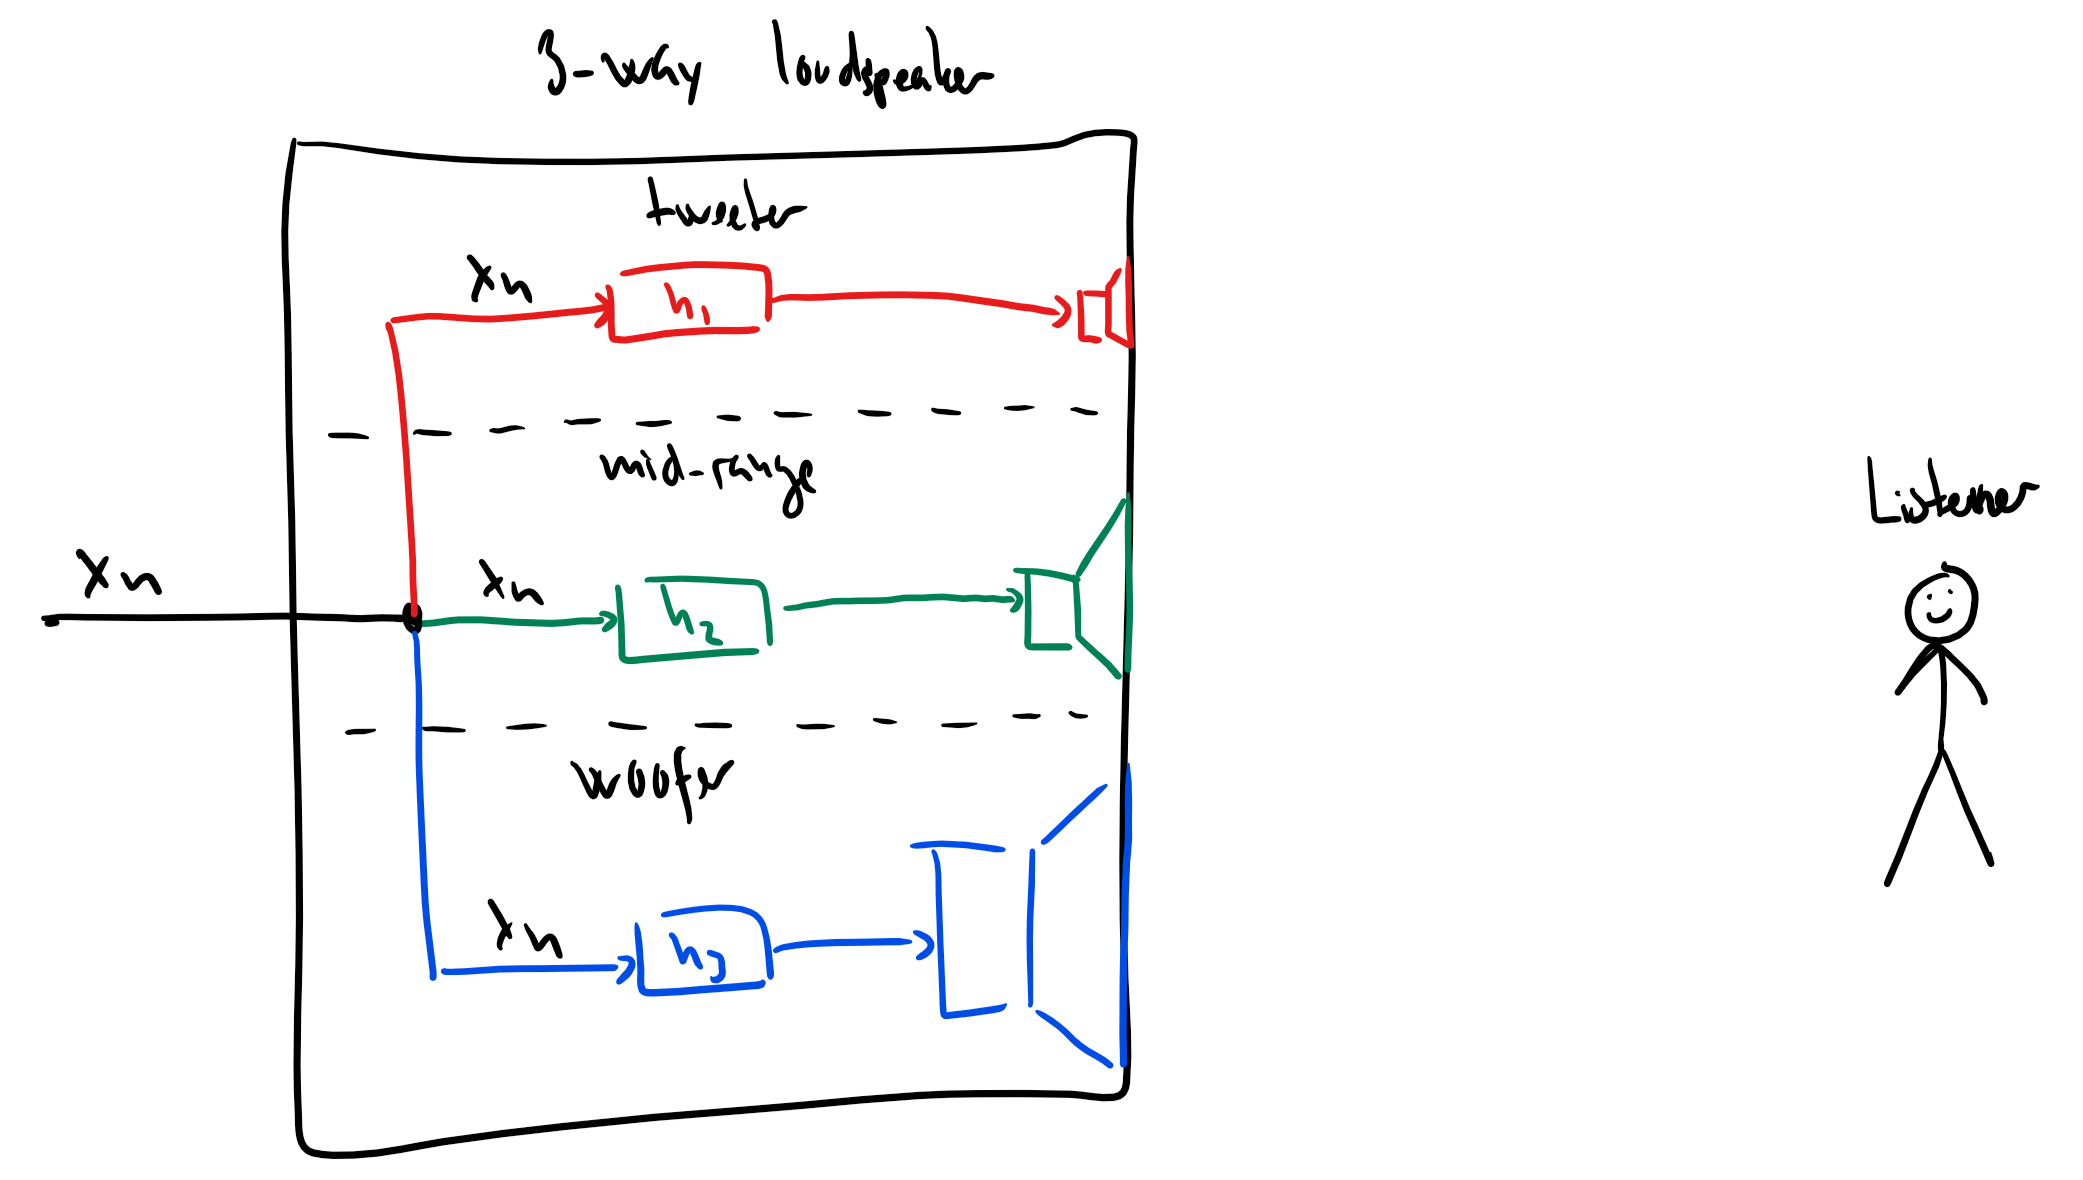

In [3]:
Image('figures/ap10ThreeWaySpeaker.png',width=myWidth)

#### Example: equalizing compensation for hearing loss

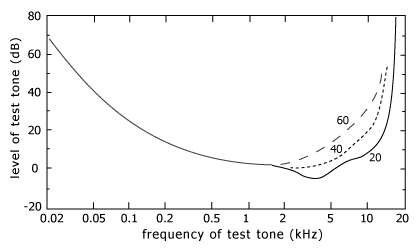

In [4]:
Image('figures/hearingThresholdVsAge.png',width=myWidth)

### A typical parametric equalizer
A common audio equalizer is a **parametric equalizer** which functions by
- dividing the frequency range into a number of bands
- apply filters in each band which can amplify/attenuate the frequency content in this band
---
Note that so-called graphic equalizers is an alternative to the parametric equalizer, but we will not cover that here.

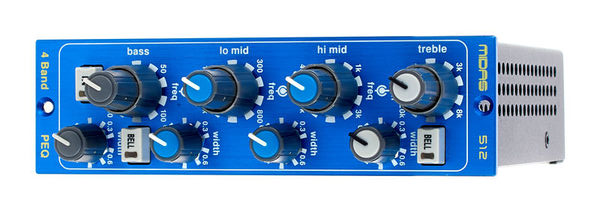

In [5]:
Image('figures/midasEqualizer.jpg',width=myWidth)

### Example of a block diagram of a parametric equalizer

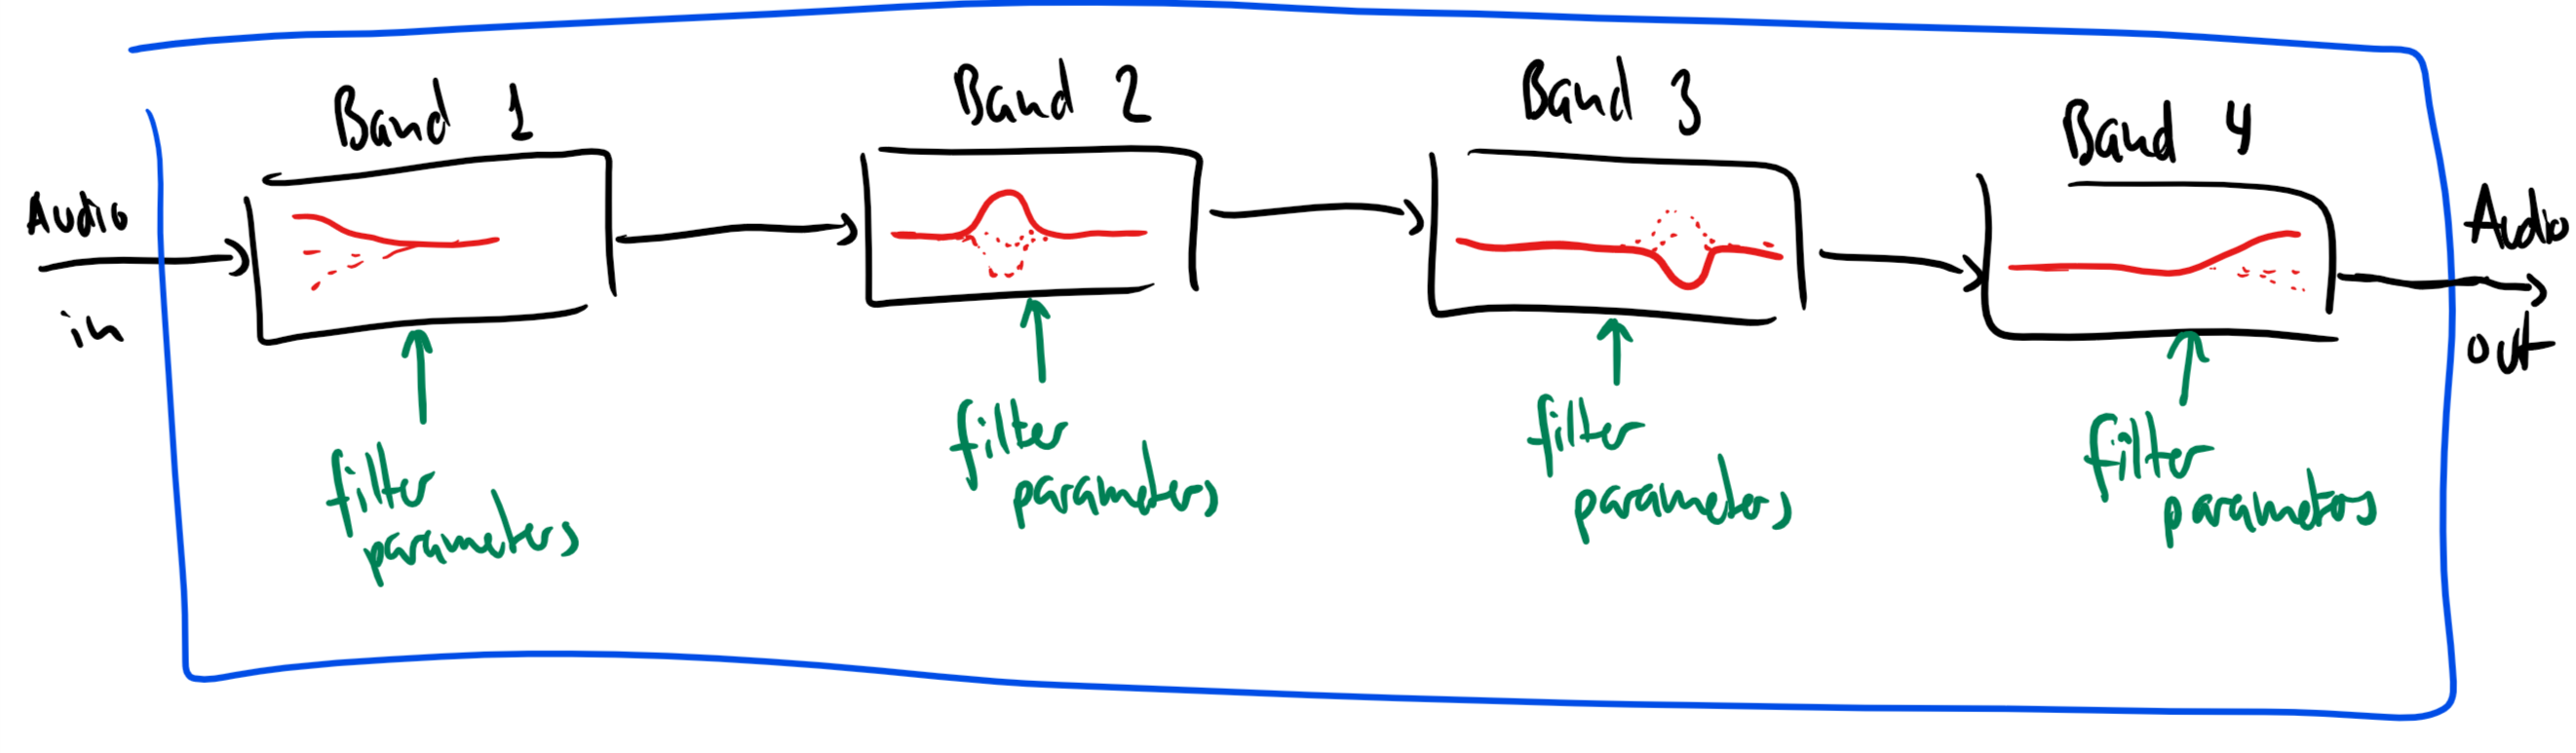

In [6]:
Image('figures/ap10ExampleEqBlockDiagram.png',width=myWidth)

The filter in each band of the parametric equalizer is called a **parametric equalizer filter**. It can be either a
- **first and last band**: lowpass or highpass filter with adjustable cut-off frequency and gain (a **shelving filter**)
- **bands in the middle**: combination of a bandpass (peak) or a bandstop (notch) filter with adjustable center frequency and bandwidth

Note that
- both of these filters can be implemented using **a second order feedback (IIR) filter**
- we will go more into depth with these two kinds of parametric equalizer filters later

### Summary
1. Audio equalizers are useful in many applications such as room compensation and the tuning of hearing aids
2. A parametric equaliser is used to amplify/attenuate the frequency content within different bands

### Active 5 minutes break
As we see later, the basic ingredient is a **parametric equalizer filter** resulting in the **difference equation**
$$
    y_n = b_0x_n + b_1 x_{n-1} + b_2 x_{n-2} + a_1y_{n-1} + a_2 y_{n-2}
$$

1. Do you know this filter? Is this a feedforward or a feedback filter?
2. What are the feedforward and feedback filter coefficients?
3. Sketch the difference equations using the delay, summation, and multiplication blocks.

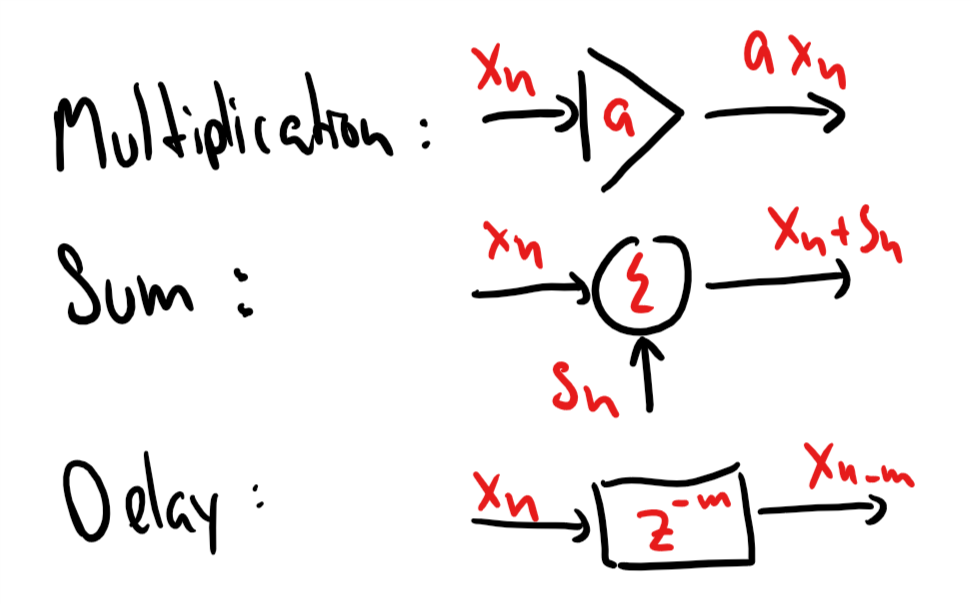

In [7]:
Image('figures/ap4FilterBuildingBlocks.png',width=myWidth/2)

## Notch and peak filters
In the next 20 minutes, you will learn
- how a parametric equalizer filter can be designed using a notch (bandstop) and peak (bandpass) filter
- how the notch filter is designed and controlled
- how the peak filter is designed and controlled

The **transfer function** of the parametric equalizer filter $H_\text{eq}(z)$ is
$$
    H_\text{eq}(z) = G_0H_\text{notch}(z) + G H_\text{peak}(z)\ .
$$
<center>
    <img src="figures/ap10ParametricEqFilter.png" alt="Parametric equalizer filter" width="70%"/>
</center>

### Notch (bandstop) filter
We will use the following notation:
- $\omega_1$ and $\omega_2$: lower and upper cutoff frequencies in radians/sample
- $\omega_0=\sqrt{\omega_1\omega_2}$: center frequency in radians/sample
- $\Delta\omega=\omega_2-\omega_1$: bandwidth in radians/sample
- $G_\text{B}$: gain at the cutoff frequencies.
<center>
    <img src="figures/ap10NotchFilterNomenclature.png" alt="The notch filter" width="50%"/>
</center>

It can be shown that the transfer function of a notch filter is given by
$$
    H_\text{notch}(z) = b\frac{1-2\cos(\omega_0)z^{-1}+z^{-2}}{1-2b\cos(\omega_0)z^{-1}+(2b-1)z^{-2}}
$$
where
- $\omega_0$ is the center frequency in radians/sample
- $b=(1+\beta)^{-1}$ where
$$
    \beta = \frac{\sqrt{1-G_\text{B}^2}}{G_\text{B}}\tan(\Delta\omega/2)
$$
- $G_\text{B}$ is the gain at the cutoff frequencies $\omega_1$ and $\omega_2$
- $\Delta\omega$ is the bandwidth (i.e., $\omega_2-\omega_1$) in radians/sample.

The notch filter results in the difference equation
$$
    y_n = bx_n -2b\cos(\omega_0)x_{n-1}+bx_{n-2} + 2b\cos(\omega_0)y_{n-1} - (2b-1) y_{n-2}
$$
<center>
    <img src="figures/ap10NotchFilterSignalFlowGraph.png" alt="The signal flow graph of a notch filter" width="70%"/>
</center>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def computeNotchFilterParameters(digCenterFreq, digBandwidth, cutoffGain):
    beta = (np.sqrt(1-cutoffGain**2)/cutoffGain)*np.tan(digBandwidth/2)
    b0 = 1/(1+beta)
    b1 = -2*b0*np.cos(digCenterFreq)
    b2 = b0
    a1 = -b1
    a2 = -(2*b0-1)
    feedforwardParams = np.array([b0, b1, b2])
    feedbackParams = np.array([a1, a2])
    return feedforwardParams, feedbackParams

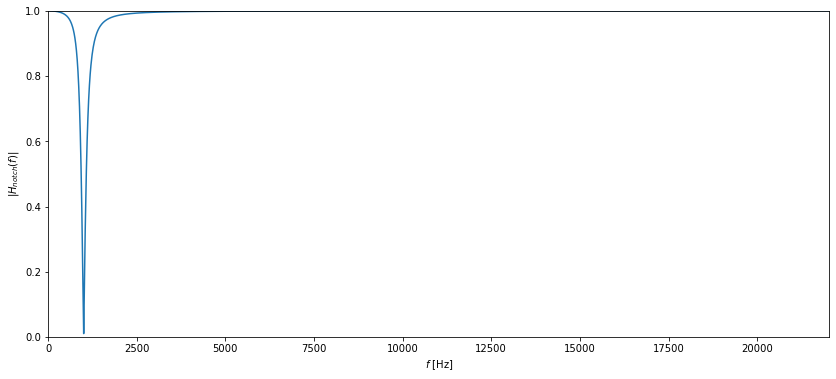

In [4]:
samplingFreq = 44100 # Hz
centerFreq = 1000 # Hz
bandwidth = 250 # Hz
cutoffGain = np.sqrt(0.5)
nDtft = 2048
feedforwardParams, feedbackParams = computeNotchFilterParameters(centerFreq*2*np.pi/samplingFreq, \
    bandwidth*2*np.pi/samplingFreq, cutoffGain)
digFreqVector, freqResp = sig.freqz(feedforwardParams, np.r_[1,-feedbackParams],nDtft)
freqVector = digFreqVector*samplingFreq/(2*np.pi)
plt.figure(figsize=(14,6))
plt.plot(freqVector, np.abs(freqResp))
plt.xlim((0,freqVector[-1])), plt.ylim((0,1)), plt.xlabel('$f$ [Hz]'), plt.ylabel('$|H_{notch}(f)|$');

### Peak (bandpass) filter
We will use the following notation:
- $\omega_1$ and $\omega_2$: lower and upper cutoff frequencies in radians/sample
- $\omega_0=\sqrt{\omega_1\omega_2}$: center frequency in radians/sample
- $\Delta\omega=\omega_2-\omega_1$: bandwidth in radians/sample
- $G_\text{B}$: gain at the cutoff frequencies.
<center>
    <img src="figures/ap10PeakFilterNomenclature.png" alt="The peak filter" width="50%"/>
</center>

It can be shown that the transfer function of a notch filter is given by
$$
    H_\text{peak}(z) = (1-b)\frac{1-z^{-2}}{1-2b\cos(\omega_0)z^{-1}+(2b-1)z^{-2}}
$$
where
- $\omega_0$ is the center frequency in radians/sample
- $b=(1+\beta)^{-1}$ where
$$
    \beta = \frac{G_\text{B}}{\sqrt{1-G_\text{B}^2}}\tan(\Delta\omega/2)
$$
- $G_\text{B}$ is the gain at the cutoff frequencies $\omega_1$ and $\omega_2$
- $\Delta\omega$ is the bandwidth (i.e., $\omega_2-\omega_1$) in radians/sample.

The peak filter results in the difference equation
$$
    y_n = (1-b)x_n - (1-b)x_{n-2} + 2b\cos(\omega_0)y_{n-1} - (2b-1) y_{n-2}
$$
<center>
    <img src="figures/ap10PeakFilterSignalFlowGraph.png" alt="The signal flow graph of a notch filter" width="70%"/>
</center>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def computePeakFilterParameters(digCenterFreq, digBandwidth, cutoffGain):
    beta = (cutoffGain/np.sqrt(1-cutoffGain**2))*np.tan(digBandwidth/2)
    b = 1/(1+beta)
    b0 = 1-b
    b1 = 0
    b2 = -b0
    a1 = 2*b*np.cos(digCenterFreq)
    a2 = -(2*b-1)
    feedforwardParams = np.array([b0, b1, b2])
    feedbackParams = np.array([a1, a2])
    return feedforwardParams, feedbackParams

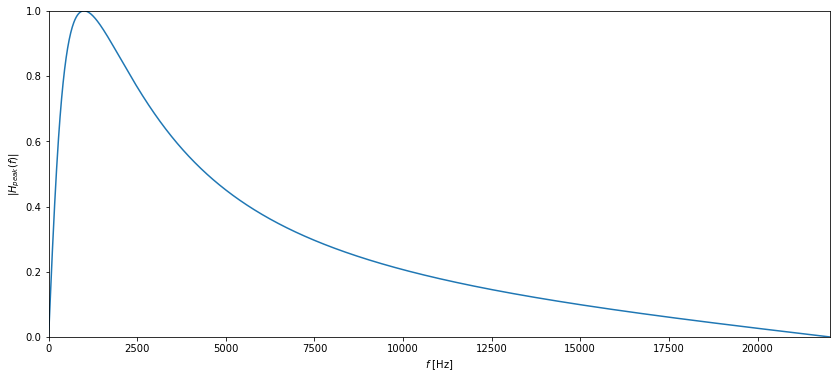

In [2]:
samplingFreq = 44100 # Hz
centerFreq = 1000 # Hz
bandwidth = 2500 # Hz
cutoffGain = np.sqrt(0.5)
nDtft = 2048
feedforwardParams, feedbackParams = computePeakFilterParameters(centerFreq*2*np.pi/samplingFreq, \
    bandwidth*2*np.pi/samplingFreq, cutoffGain)
digFreqVector, freqResp = sig.freqz(feedforwardParams, np.r_[1,-feedbackParams],nDtft)
freqVector = digFreqVector*samplingFreq/(2*np.pi)
plt.figure(figsize=(14,6))
plt.plot(freqVector, np.abs(freqResp))
plt.xlim((0,freqVector[-1])), plt.ylim((0,1)), plt.xlabel('$f$ [Hz]'), plt.ylabel('$|H_{peak}(f)|$');

### Summary
1. A notch (bandstop) filter can be used to remove frequencies
<center>
    <img src="figures/ap10NotchFilterNomenclature.png" alt="The notch filter" width="30%"/>
</center>
2. A peak (bandpass) filter can be used to remove frequencies
<center>
    <img src="figures/ap10PeakFilterNomenclature.png" alt="The notch filter" width="30%"/>
</center>

## Parametric equalizer filter
In the next 20 minutes, you will learn
- how we can combine a notch and a peak filter into a parametric equalizer filter

We can write the transfer function of the peak and notch filters as
\begin{align}
    H_\text{notch}(z) &= \frac{A_\text{notch}(z)}{B_\text{notch}(z)}\\
    H_\text{peak}(z) &= \frac{A_\text{peak}(z)}{B_\text{peak}(z)}
\end{align}
where
\begin{align}
    A_\text{notch}(z) &= b_\text{notch}(1-2\cos(\omega_0)z^{-1}+z^{-2})\\
    B_\text{notch}(z) &= 1-2b_\text{notch}\cos(\omega_0)z^{-1}+(2b_\text{notch}-1)z^{-2}\\
    A_\text{peak}(z) &= (1-b_\text{peak})(1-z^{-2})\\
    B_\text{peak}(z) &= 1-2b_\text{peak}\cos(\omega_0)z^{-1}+(2b_\text{peak}-1)z^{-2}\ .
\end{align}

Recall that the **transfer function** of the parametric equalizer filter $H_\text{eq}(z)$ is
$$
    H_\text{eq}(z) = G_0H_\text{notch}(z) + G H_\text{peak}(z)\ .
$$
<center>
    <img src="figures/ap10ParametricEqFilter.png" alt="Parametric equalizer filter" width="70%"/>
</center>

Note that
- $G_0$ (which is sometimes called the level) is often set to 1
- $G>G_0$ results in a boost of some frequencies
- $G<G_0$ results in a cut of some frequencies

<center>
    <img src="figures/ap10ParametricEqFilter.png" alt="Parametric equalizer filter" width="50%"/>
</center>

We have
\begin{align}
    H_\text{eq}(z) &= G_0H_\text{notch}(z) + G H_\text{peak}(z)\\
    &= \frac{G_0A_\text{notch}(z)B_\text{peak}(z)+GA_\text{peak}(z)B_\text{notch}(z)}{B_\text{notch}(z)B_\text{peak}(z)}
\end{align}
with three interesting special cases:
1. $G_0=G=1$: the signal passes unaltered, i.e., $H_\text{eq}(z)=1$
2. $G_0=1$ and $G=0$: the parametric equalizer filter is a notch filter, i.e., $H_\text{eq}(z)=H_\text{notch}(z)$
3. $G_0=0$ and $G=1$: the parametric equalizer filter is a peak filter, i.e., $H_\text{eq}(z)=H_\text{peak}(z)$

After a lot of math, it can be shown that
$$
    H_\text{eq}(z) = \frac{b_0 + b_1z^{-1}+b_2z^{-2}}{1 - a_1z^{-1}-a_2z^{-2}}
$$
where we have defined
\begin{alignat}{2}
    b_0 &= \frac{G_0+G\alpha}{1+\alpha}\ , &\qquad b_1 &= \frac{-2G_0\cos(\omega_0)}{1+\alpha}\\
    b_2 &= \frac{G_0-G\alpha}{1+\alpha}\ , &\qquad a_1 &= \frac{2\cos(\omega_0)}{1+\alpha}\\
    a_2 &= -\frac{1-\alpha}{1+\alpha}\ , &\qquad \alpha &= \sqrt{\frac{G_\text{B}^2-G_0^2}{G^2-G_\text{B}^2}}\tan(\Delta\omega/2)\ .
\end{alignat}

#### Example: design of parametric equalizer filter
Assume that the user can control the three parameters
1. center frequency $\omega_0$
2. bandwidth $\Delta\omega$
3. boost/cut $G$

When design the parametric equalizer filter as
1. calculate the cutoff gain as either
$$
    G_\text{B}^2 = G_0G \quad\text{or}\quad G_\text{B} = G_0^2/2+G^2/2
$$
with (typically) $G_0=1$.
2. Compute $\alpha$ and the filter coefficients $b_0$, $b_1$, $b_2$, $a_1$, and $a_2$ (see above) 

The parametric equalizer filter results in the difference equation
$$
    y_n = b_0x_n + b_1 x_{n-1} + b_2 x_{n-2} + a_1y_{n-1} + a_2 y_{n-2}
$$
<center>
    <img src="figures/ap10SecondOrderFilterSignalFlowGraph.png" alt="Second order IIR filter" width="70%"/>
</center>

In [18]:
def paramEqFilterCoefficients(digCenterFreq, digBandwidth, gain, level=1):
    if gain == level:
        feedforwardParams = np.array([1, 0, 0])
        feedbackParams = np.array([0, 0])
    else:
        cutoffGain = np.sqrt((gain**2+level**2)/2) # could also be the geometric mean instead
        alpha = np.sqrt((cutoffGain**2-level**2)/(gain**2-cutoffGain**2))*np.tan(digBandwidth/2)
        b0 = (level+gain*alpha)/(1+alpha)
        b1 = -2*level*np.cos(digCenterFreq)/(1+alpha)
        b2 = (level-gain*alpha)/(1+alpha)
        a1 = 2*np.cos(digCenterFreq)/(1+alpha)
        a2 = -(1-alpha)/(1+alpha)
        feedforwardParams = np.array([b0, b1, b2])
        feedbackParams = np.array([a1, a2])
    return feedforwardParams, feedbackParams

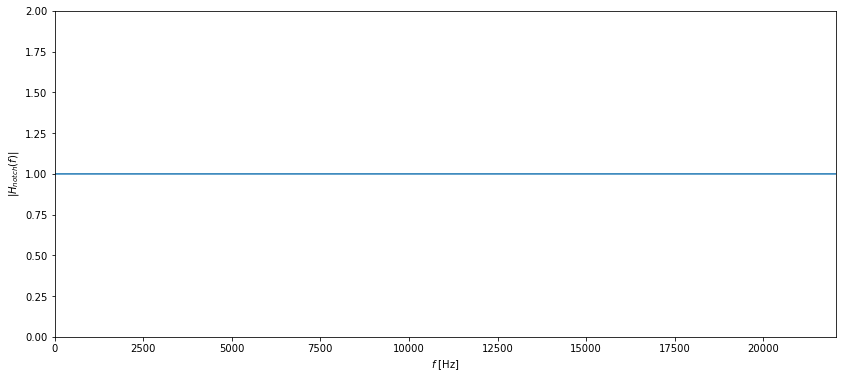

In [19]:
samplingFreq = 44100 # Hz
centerFreq = 1000 # Hz
bandwidth = 2500 # Hz
gain = 1
nDtft = 2048
feedforwardParams, feedbackParams = paramEqFilterCoefficients(centerFreq*2*np.pi/samplingFreq, \
    bandwidth*2*np.pi/samplingFreq, gain)
digFreqVector, freqResp = sig.freqz(feedforwardParams, np.r_[1,-feedbackParams],nDtft)
freqVector = digFreqVector*samplingFreq/(2*np.pi)
plt.figure(figsize=(14,6))
plt.plot(freqVector, np.abs(freqResp))
plt.xlim((0,freqVector[-1])), plt.ylim((0,2)), plt.xlabel('$f$ [Hz]'), plt.ylabel('$|H_{notch}(f)|$');

### Summary
1. A parametric equalizer filter is a way of boosting or cutting some frequencies using a combination of peak and notch filters.
2. Typically, the user can control 
 - $\omega_0$: the center frequency,
 - $\Delta\omega$: the bandwidth, and
 - $G$: the amount of boost/cut 

<center>
    <img src="figures/ap10ParametricEqFilter.png" alt="Parametric equalizer filter" width="70%"/>
</center>

### Active 5 minutes break
1. Together with your neighbour, explain as much as you can about the equalizer on the picture (i.e., number of bands, user parameters, etc.)
<center>
    <img src="figures/dbx555Eq.jpg" alt="dbx 555 equalizer" width="80%"/>
</center>

## Shelving filters 
In the next 20 minutes, you will learn
- what a shelving filter is and why we need them
- that a shelving filter is a special case of the parametric equalizer filter

Recall that a **parametric equalizer** functions by
- dividing the frequency range into a number of bands
- apply filters in each band which can amplify/attenuate the frequency content in this band

What about the first (low frequencies) and last (high frequencies) band?
<center>
    <img src="figures/midasEqualizer.jpg" alt="Example of equalizer" width="90%"/>
</center>

For the low and high frequencies, traditional low- and highpass filters are used instead of peak and notch filters. When used as shown below, the filter is called a **shelving filter**!

The shelving filter exists in two forms:
1. Low frequency shelving filter
2. High frequency shelving filter

<center>
    <img src="figures/ap10ShelvingEqFilter.png" alt="Shelving equalizer filter" width="70%"/>
</center>

### Low frequency shelving filter
The low frequency shelving filter is simply the **parametric equalizer filter** with $\omega_0 = 0$ which can be written as
\begin{align}
    H_\text{low}(z) &= \frac{(b_0-b_2z^{-1})(1-z^{-1})}{(1+a_2z^{-1})(1-z^{-1})}\\
    &= \frac{b_0-b_2z^{-1}}{1+a_2z^{-1}}
\end{align}
since $\cos(\omega_0)=1$ for $\omega_0=0$ where (as before)
\begin{alignat}{2}
    b_0 &= \frac{G_0+G\alpha}{1+\alpha}\ , &\qquad b_2 &= \frac{G_0-G\alpha}{1+\alpha}\\
    a_2 &= -\frac{1-\alpha}{1+\alpha}\ , &\qquad \alpha &= \sqrt{\frac{G_\text{B}^2-G_0^2}{G^2-G_\text{B}^2}}\tan(\Delta\omega/2)\ .
\end{alignat}

In the context of the **low frequency shelving filter**, the meaning of $\Delta\omega$ and $G_\text{B}$ are
- $\Delta\omega$: the cutoff frequency which is sometimes denoted as $\omega_\text{c}$
- $G_\text{B}$: the gain at the cutoff frequency which is sometimes denoted as $G_\text{C}$

<center>
    <img src="figures/ap10LowShelvingFilter.png" alt="Low shelving filter" width="60%"/>
</center>

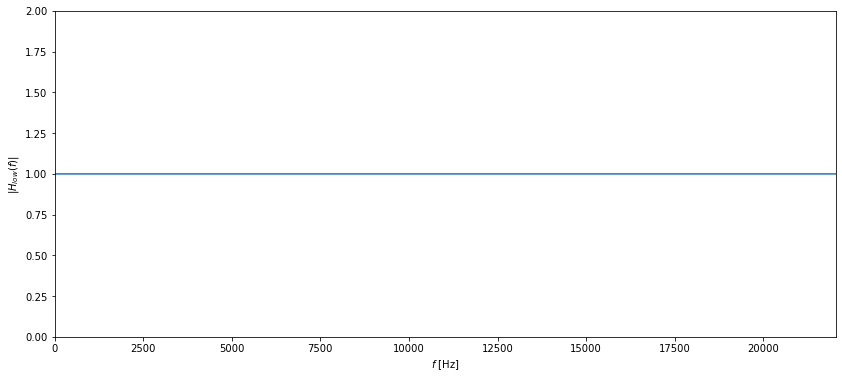

In [20]:
samplingFreq = 44100 # Hz
centerFreq = 1 # Hz - for low shelving filter
cutoffFreq = 250 # Hz
gain = 1
nDtft = 2048
feedforwardParams, feedbackParams = paramEqFilterCoefficients(centerFreq*2*np.pi/samplingFreq, \
    cutoffFreq*2*np.pi/samplingFreq, gain)
digFreqVector, freqResp = sig.freqz(feedforwardParams, np.r_[1,-feedbackParams],nDtft)
freqVector = digFreqVector*samplingFreq/(2*np.pi)
plt.figure(figsize=(14,6))
plt.plot(freqVector, np.abs(freqResp))
plt.xlim((0,freqVector[-1])), plt.ylim((0,2)), plt.xlabel('$f$ [Hz]'), plt.ylabel('$|H_{low}(f)|$');

### High frequency shelving filter
The high frequency shelving filter is simply the **parametric equalizer filter** with $\omega_0 = \pi$ which can be written as
\begin{align}
    H_\text{high}(z) &= \frac{(b_0+b_2z^{-1})(1-z^{-1})}{(1-a_2z^{-1})(1-z^{-1})}\\
    &= \frac{b_0+b_2z^{-1}}{1-a_2z^{-1}}
\end{align}
since $\cos(\omega_0)=-1$ for $\omega_0=\pi$ where (as before)
\begin{alignat}{2}
    b_0 &= \frac{G_0+G\alpha}{1+\alpha}\ , &\qquad b_2 &= \frac{G_0-G\alpha}{1+\alpha}\\
    a_2 &= -\frac{1-\alpha}{1+\alpha}\ , &\qquad \alpha &= \sqrt{\frac{G_\text{B}^2-G_0^2}{G^2-G_\text{B}^2}}\tan(\Delta\omega/2)\ .
\end{alignat}

In the context of the **high frequency shelving filter**, the meaning of $\Delta\omega$ and $G_\text{B}$ are
- $\Delta\omega$: the Nyquist frequency minus the cutoff frequency, i.e., $\Delta\omega=\pi-\omega_\text{c}$
- $G_\text{B}$: the gain at the cutoff frequency which is sometimes denoted as $G_\text{C}$

<center>
    <img src="figures/ap10HighShelvingFilter.png" alt="High shelving filter" width="60%"/>
</center>

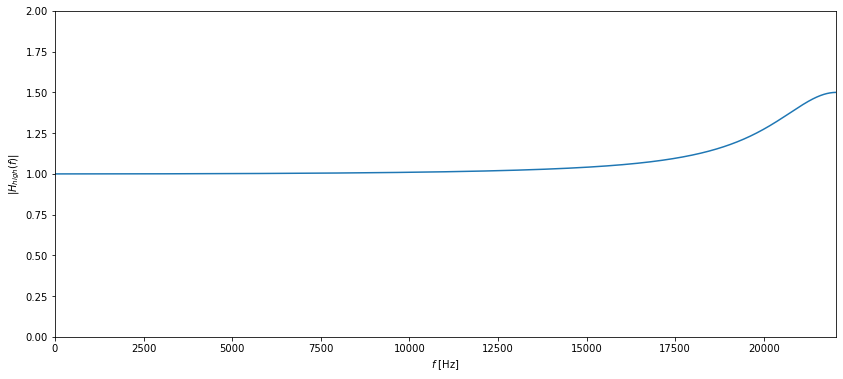

In [21]:
samplingFreq = 44100 # Hz
centerFreq = samplingFreq/2 # Hz - for high shelving filter
cutoffFreq = 20000 # Hz
gain = 1.5
nDtft = 2048
feedforwardParams, feedbackParams = paramEqFilterCoefficients(centerFreq*2*np.pi/samplingFreq, \
    np.pi-cutoffFreq*2*np.pi/samplingFreq, gain)
digFreqVector, freqResp = sig.freqz(feedforwardParams, np.r_[1,-feedbackParams],nDtft)
freqVector = digFreqVector*samplingFreq/(2*np.pi)
plt.figure(figsize=(14,6))
plt.plot(freqVector, np.abs(freqResp))
plt.xlim((0,freqVector[-1])), plt.ylim((0,2)), plt.xlabel('$f$ [Hz]'), plt.ylabel('$|H_{high}(f)|$');

### Multi-band parametric equalizer
Building a multi-band parametric equalizer is simply a question of
- designing a number of parametric equalizer filters (possibly as low and high shelving filters)
- connect all the parametric equalizer filters in series
<center>
    <img src="figures/ap10ExampleEqBlockDiagram.png" alt="Example of equalizer" width="90%"/>
</center>

In [22]:
def multibandParametricEq(digCenterFreqs, digBandwidths, gains, nDtft=0):
    nBands = np.size(digCenterFreqs)
    feedforwardParams = np.zeros((3,nBands))
    feedbackParams = np.zeros((2,nBands))
    if nDtft > 0:
        freqResp = np.ones(nDtft)
    for ii in np.arange(nBands):
        feedforwardParams[:,ii], feedbackParams[:,ii] = \
            paramEqFilterCoefficients(digCenterFreqs[ii], digBandwidths[ii], gains[ii])
        if nDtft > 0:
            digFreqVector, iifreqResp = \
                sig.freqz(feedforwardParams[:,ii], np.r_[1,-feedbackParams[:,ii]],nDtft)
            freqResp = freqResp*iifreqResp
    if nDtft > 0:
        return feedforwardParams, feedbackParams, digFreqVector, freqResp
    else:
        return feedforwardParams, feedbackParams

In [27]:
samplingFreq = 44100 # Hz
centerFreqs = np.array([1, 3000, 10000, samplingFreq/2]) # Hz
bandwidths = np.array([1000, 1000, 300, 15000]) # Hz
gains = np.array([1.2, 0.2, 2, 0.8])
nDtft = 2048
feedforwardParams, feedbackParams, digFreqVector, freqResp = \
    multibandParametricEq(centerFreqs*2*np.pi/samplingFreq, bandwidths*2*np.pi/samplingFreq, gains, nDtft)

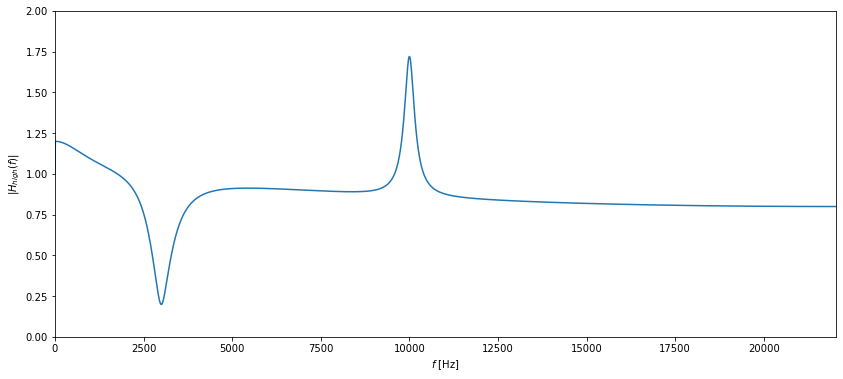

In [17]:
freqVector = digFreqVector*samplingFreq/(2*np.pi)
plt.figure(figsize=(14,6))
plt.plot(freqVector, np.abs(freqResp))
plt.xlim((0,freqVector[-1])), plt.ylim((0,2)), plt.xlabel('$f$ [Hz]'), plt.ylabel('$|H_{high}(f)|$');

### Summary
1. Shelving filters are low and high pass filters which can either amplify or attenuate low and high frequencies.
2. Shelving filters are used only for the first and last band of an equalizer.
3. A shelving filter is a special case of the parametric equalizer filter.
<center>
    <img src="figures/midasEqualizer.jpg" alt="Example of equalizer" width="90%"/>
</center>